# News content analysis
Haoxian Hu 04/27/2019

The codes show some samples of NLP (Natural Language Processing) basing on a news dataset.

There 3 main parts of this document:
1. N-gram modeling and visualization
2. Topic modeling and visualization
3. Term-document matrix modeling

In [1]:
import pandas as pd
import nltk
from nltk import sent_tokenize, word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.util import ngrams

### Data pre-analysis

In [2]:
# load the news dataset
news = pd.read_json('News_Category_Dataset_v2.json', lines=True)
print('There are',news.shape[0],'rows and',news.shape[1],'columns in this dataset.')

There are 200853 rows and 6 columns in this dataset.


In [3]:
print('The first 5 rows of our dataset:')
news.head()

The first 5 rows of our dataset:


authors       category       date  \
0  Melissa Jeltsen          CRIME 2018-05-26   
1    Andy McDonald  ENTERTAINMENT 2018-05-26   
2       Ron Dicker  ENTERTAINMENT 2018-05-26   
3       Ron Dicker  ENTERTAINMENT 2018-05-26   
4       Ron Dicker  ENTERTAINMENT 2018-05-26   

                                            headline  \
0  There Were 2 Mass Shootings In Texas Last Week...   
1  Will Smith Joins Diplo And Nicky Jam For The 2...   
2    Hugh Grant Marries For The First Time At Age 57   
3  Jim Carrey Blasts 'Castrato' Adam Schiff And D...   
4  Julianna Margulies Uses Donald Trump Poop Bags...   

                                                link  \
0  https://www.huffingtonpost.com/entry/texas-ama...   
1  https://www.huffingtonpost.com/entry/will-smit...   
2  https://www.huffingtonpost.com/entry/hugh-gran...   
3  https://www.huffingtonpost.com/entry/jim-carre...   
4  https://www.huffingtonpost.com/entry/julianna-...   

                                   short_description  
0  She left her husband. He killed their children...  
1                           Of course it has a song.  
2  The actor and his longtime girlfriend Anna Ebe...  
3  The actor gives Dems an ass-kicking for not fi...  
4  The "Dietland" actress said using the bags is ...

### 1. N-gram modeling and visualization

#### Data cleaning and tokenization
Words will be token from unstructured text.

Cleaning data is necessary because large amount of stop words such "and", "or", and "the" usually contain no information.

In [4]:
#extract 'headline' and 'short_description' from the data
headline = news['headline']                              
desc = news['short_description']
    
#combine headline and short_descriptions
text = headline.append(desc)
    
#replace '\u' with ' ' in the text
text2 = list(text.replace('u',' '))
    
#change list into string
str1 = "".join(text2)
tokens = nltk.word_tokenize(str1)
    
#change all tokens into lower case  
words1 = [w.lower() for w in tokens]                 
    
#only keep text words, no numbers 
words2 = [w for w in words1 if w.isalpha()]
    
#remove stopwords such as "and", "or", making the result more meaningful
stopword = stopwords.words('english')
words_nostopwords = [w for w in words2 if w not in stopword]
    
#reduce different tenses of the same word (e.g. 'ate', 'eaten' → 'eat') 
porter = nltk.PorterStemmer()                         
stem1 = [porter.stem(w) for w in words_nostopwords]
wnl = nltk.WordNetLemmatizer()                        
lemmatization = [wnl.lemmatize(w) for w in stem1]

print('Cleand data samples:\n',lemmatization[0:30])

Cleand data samples:
 ['mass', 'shoot', 'texa', 'last', 'week', 'tvwill', 'smith', 'join', 'diplo', 'nicki', 'jam', 'world', 'cup', 'offici', 'songhugh', 'grant', 'marri', 'first', 'time', 'age', 'carrey', 'blast', 'adam', 'schiff', 'democrat', 'new', 'artworkjulianna', 'marguli', 'use', 'donald']


#### Modeling
Besides showing all words, Nouns will also be displayed separately because they normaly contain specific informaiton.

In [5]:
#Get the word frequency distribution
freq_word = FreqDist(lemmatization)                  
print('The word frequency model is ready.')

#Get the bigram frequency distribution
bigrams=list(ngrams(lemmatization,2))
freq_bigrams = FreqDist(bigrams)                     
print('\nThe bigram model is ready.')

POS_tags = nltk.pos_tag(lemmatization)

#Get the word frequency distribution (Noun)
POS_tag_listN = [(word,tag) for (word,tag) in POS_tags if tag.startswith('N')]
tag_freq_N = nltk.FreqDist(POS_tag_listN)
print('\nThe word frequency (Noun) model is ready.')

#Get the word frequency distribution (Noun, plural)
POS_tag_listNNS = [(word,tag) for (word,tag) in POS_tags if tag.startswith('NNS')]
tag_freq_NNS = nltk.FreqDist(POS_tag_listNNS)
print('\nThe word frequency (Noun, plural) model is ready.')

The word frequency model is ready.

The bigram model is ready.

The word frequency (Noun) model is ready.

The word frequency (Noun, plural) model is ready.


#### Visualization

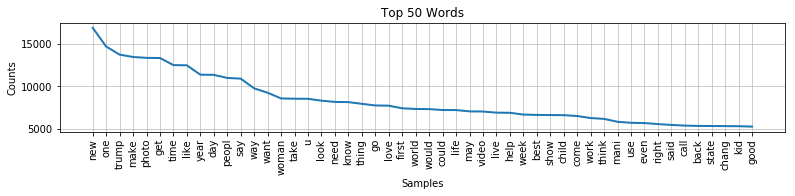

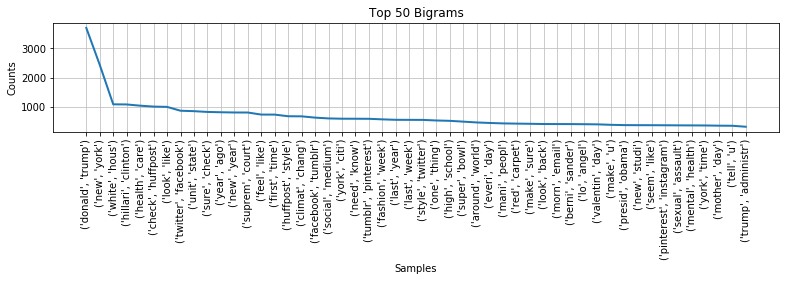

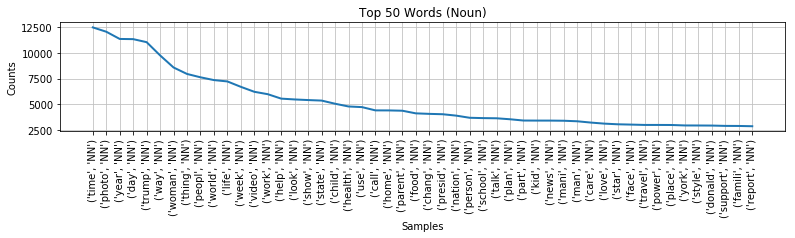

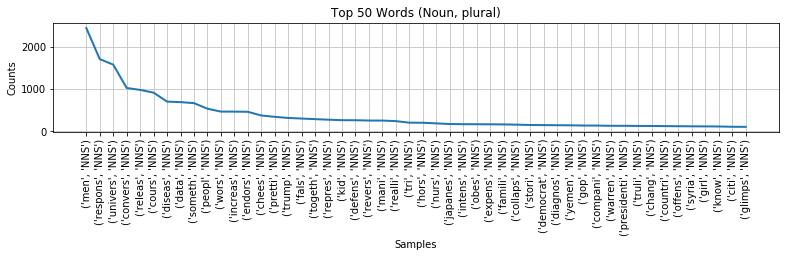

In [7]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(13, 2))
freq_word.plot(50, title = 'Top 50 Words')

figure = plt.figure(figsize=(13, 2))
freq_bigrams.plot(50, title = 'Top 50 Bigrams')

figure = plt.figure(figsize=(13, 2))
tag_freq_N.plot(50, title = 'Top 50 Words (Noun)')

figure = plt.figure(figsize=(13, 2))
tag_freq_NNS.plot(50, title = 'Top 50 Words (Noun, plural)')

##### Besides line charts, word clouds of "short_description" in each category will be shown. These figures show frequent words in a more direct way.

In [8]:
import numpy as np
from PIL import Image             #import Image to load images
import requests                   #import request to crawl images online 
from wordcloud import WordCloud   #import WordCloud packages

#set the shape of WordCloud by an image on the Internet
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/6/b/6/f/12387028711996368475rugby471_Tango_Style_Mushroom.svg.med.png', stream=True).raw))

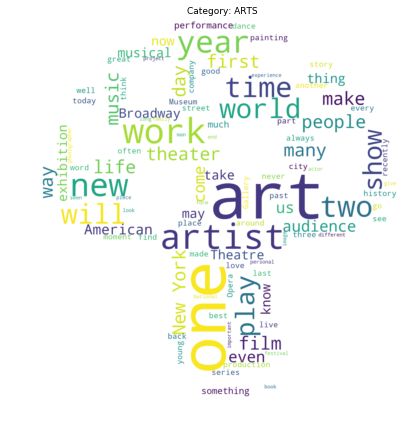

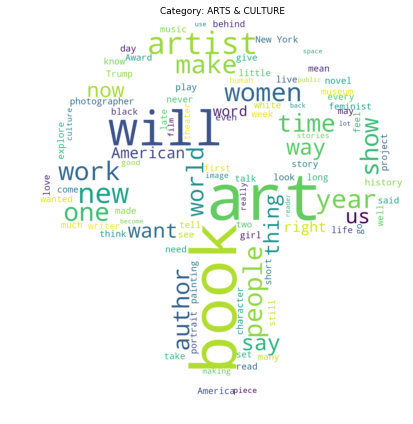

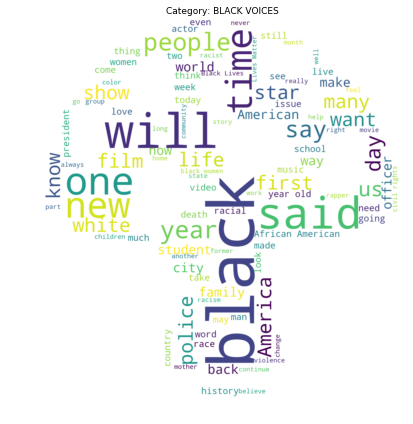

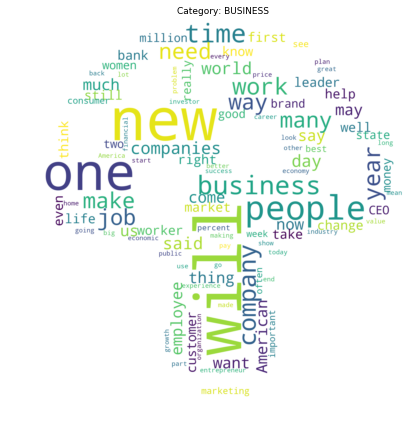

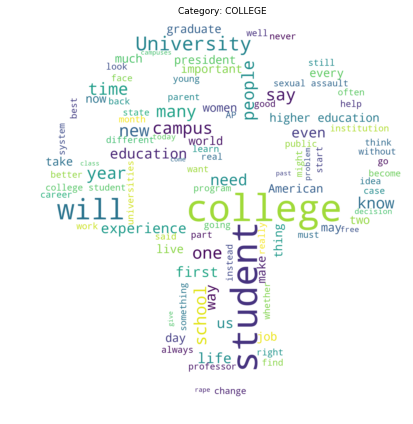

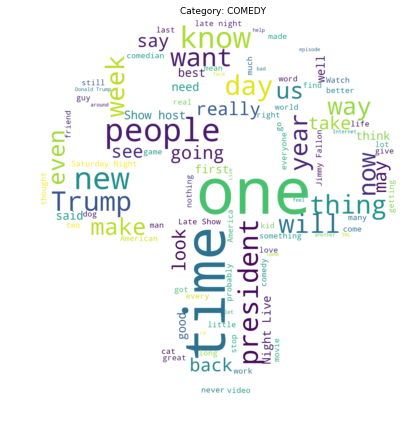

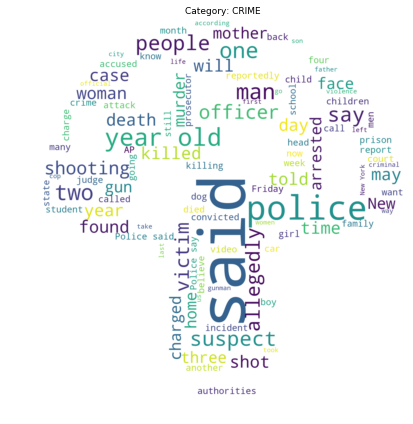

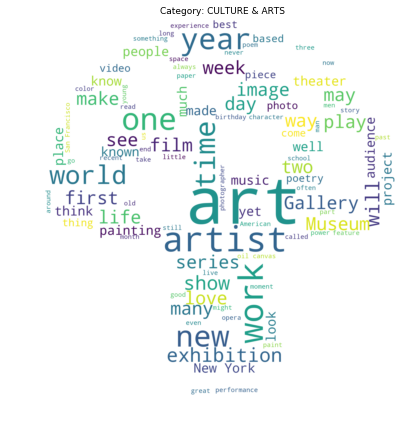

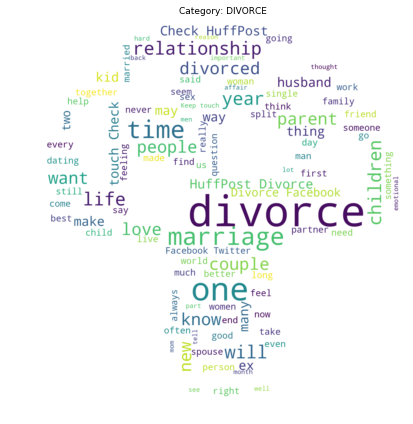

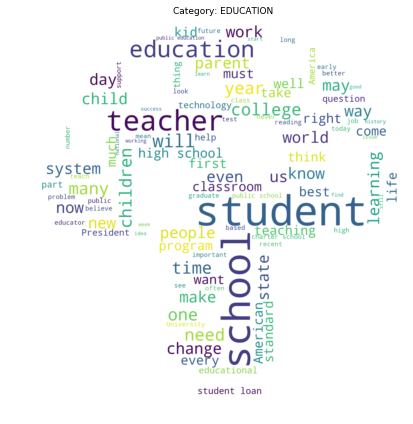

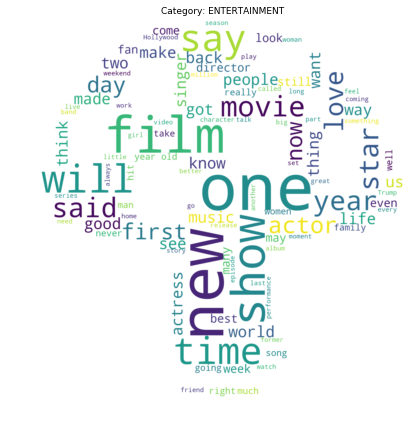

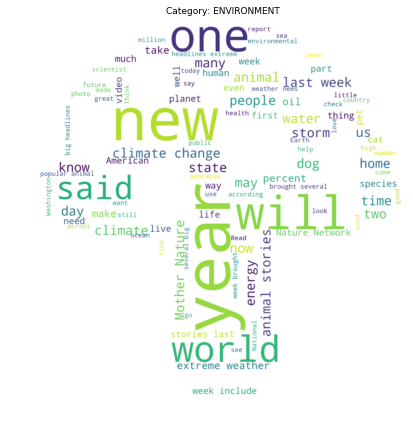

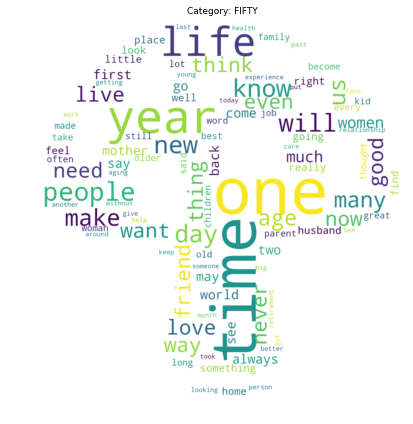

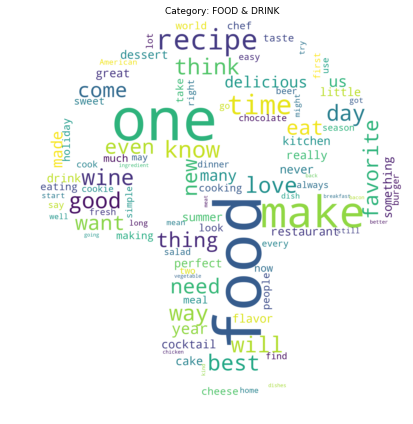

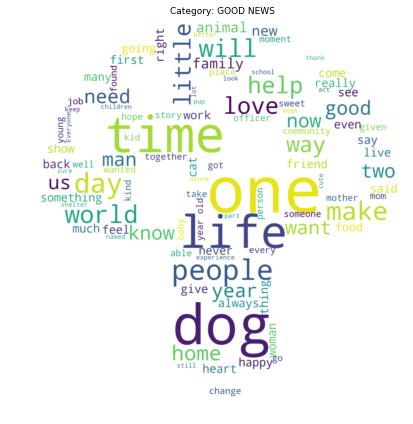

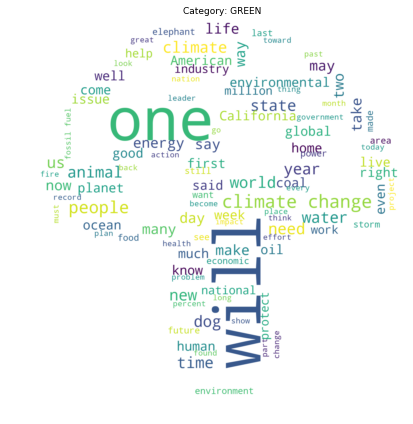

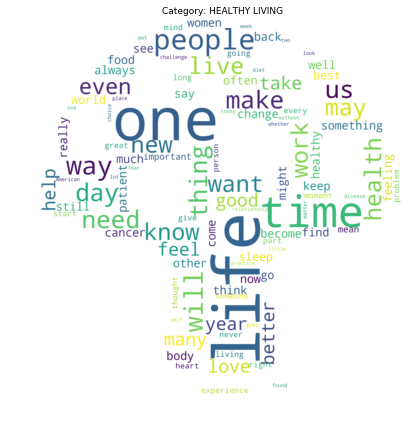

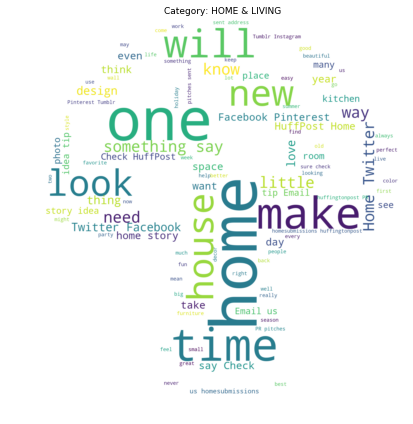

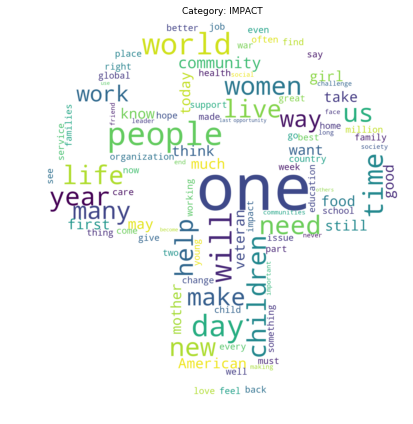

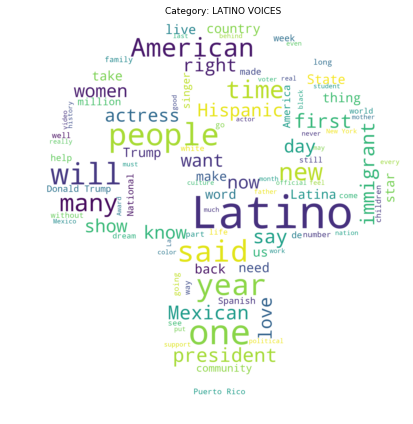

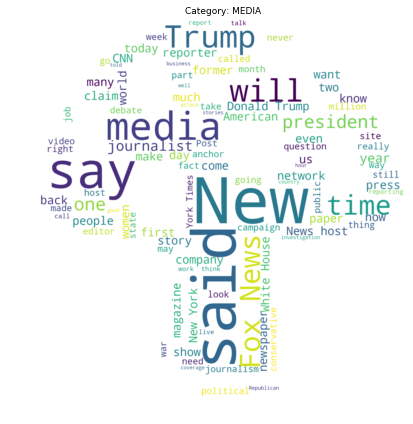

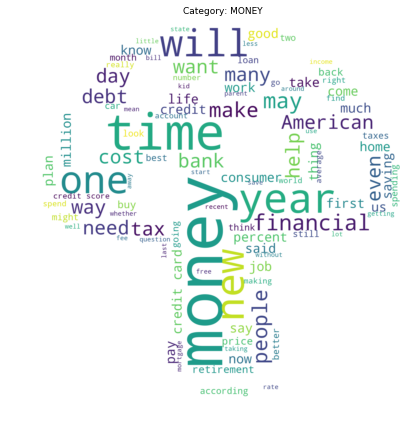

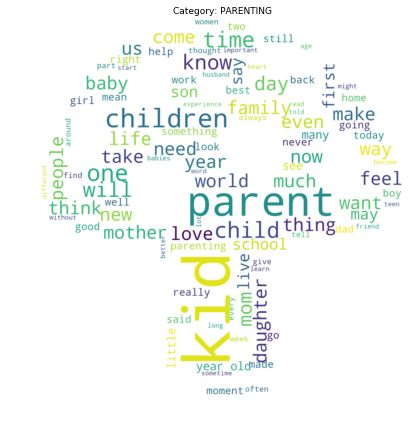

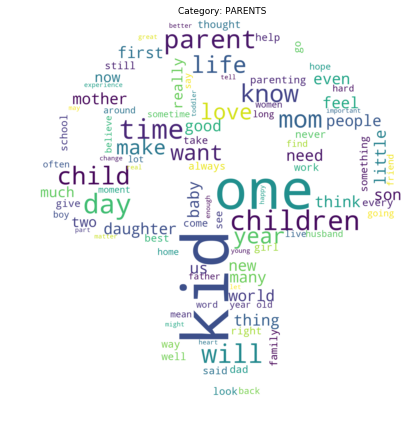

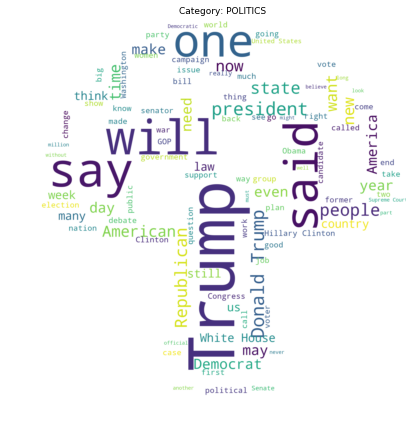

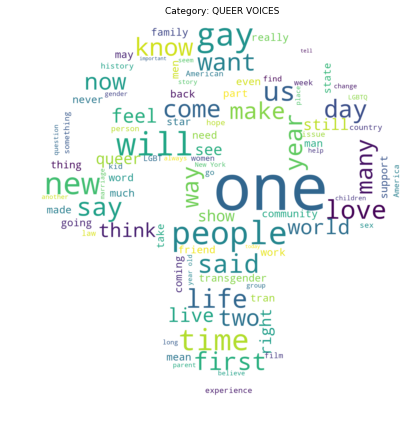

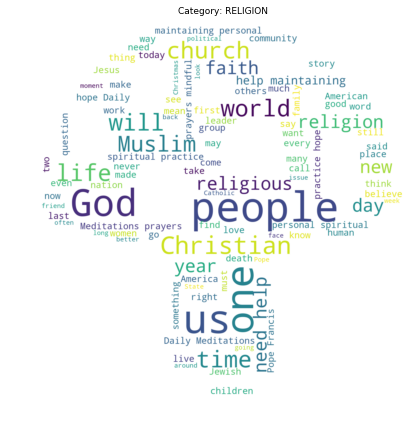

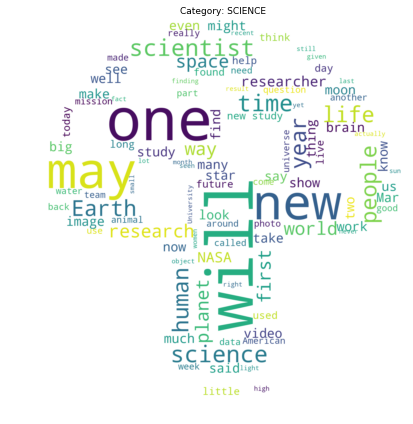

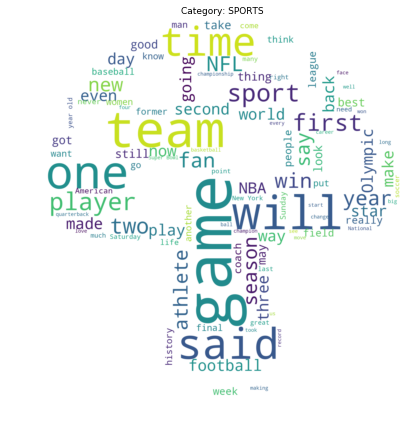

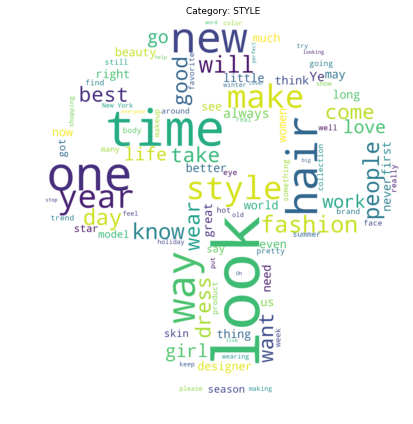

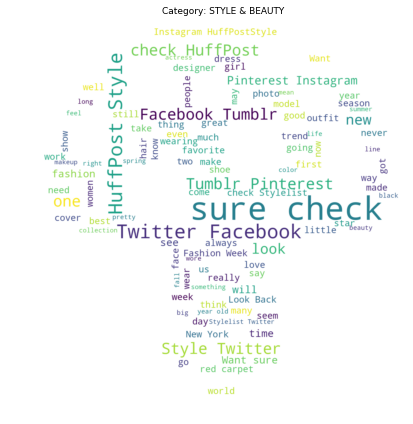

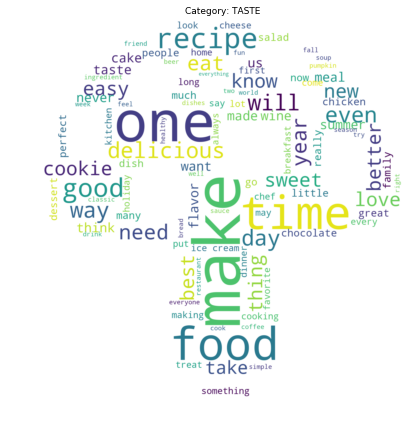

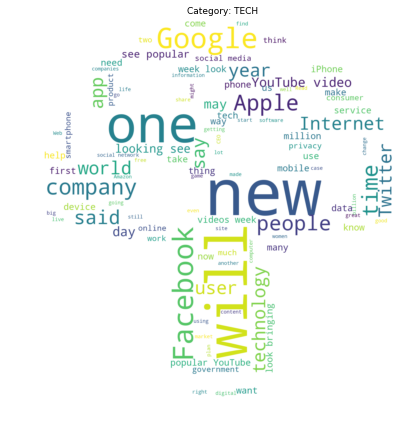

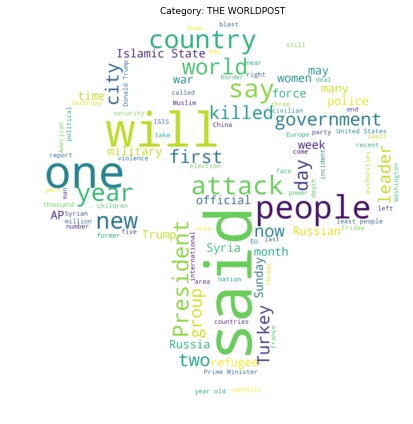

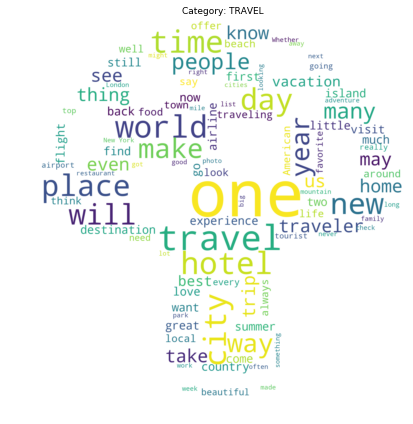

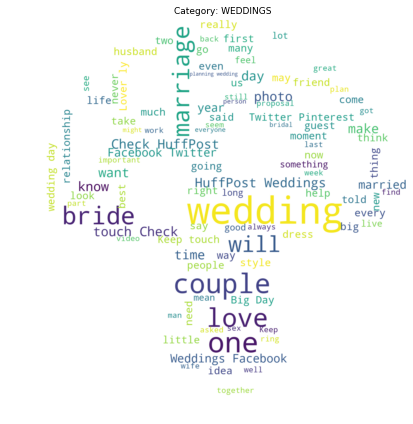

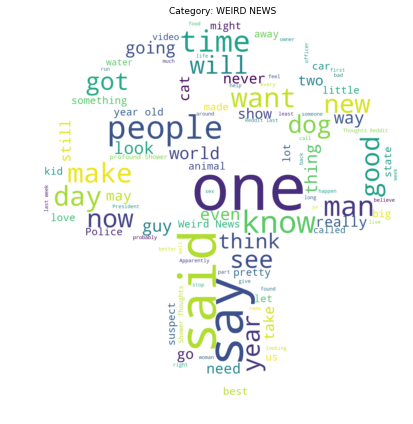

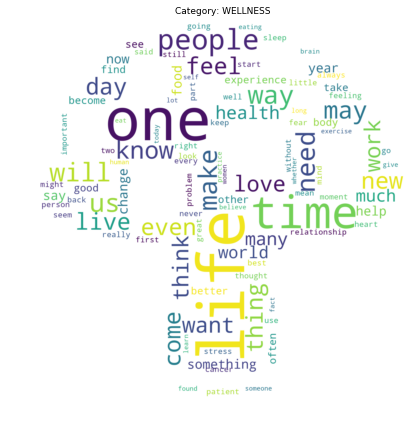

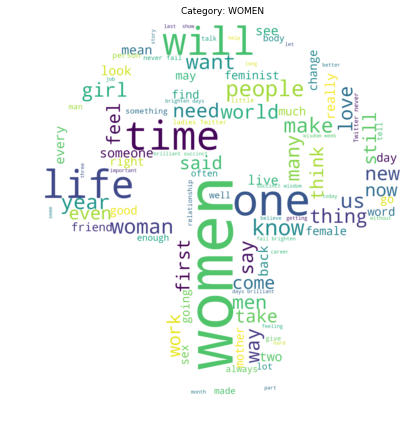

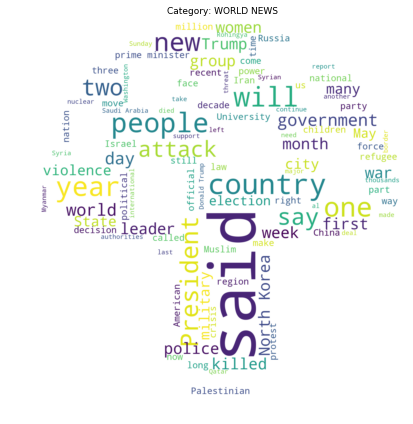

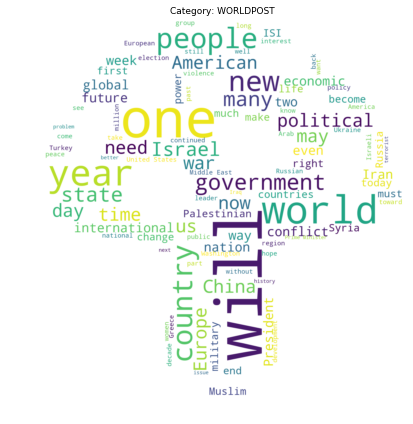

In [9]:
#Visualize Word Cloud by categories

for i in news.groupby('category').count().index:                 #select categories one by one
    cate = news.loc[news['category'] == i, 'short_description']  
    str_cate = "".join(cate)                                     #change the description from list[] to string()
    
    #Set parameters of WordCloud
    wordcloud = WordCloud(scale=6, max_font_size=50, max_words=100, background_color="white", mask = mask).generate(str_cate)
    
    #Visualization
    plt.figure(figsize = (10,7))
    plt.title('Category: {}'.format(i), fontsize = 9)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

### Topic Modeling
Topic modeling is a method to extract information from text, offering us not only the insight of the text, but also new features for futher modeling. 

The model below is built from "short_description".

In [10]:
import gensim
from gensim import corpora,models
from gensim.models import LdaModel

# lower the letter in "description", remove stopwords and numbers
tokens_list = [[word for word in review.lower().split(' ') if word not in stopword and word.isalpha()] for review in desc]

# get the words which appear more than once because these words are too unique to contain general information
from collections import defaultdict
frequency = defaultdict(int)

for tokens in tokens_list:
    for token in tokens:
        frequency[token] += 1
        
tokens_list = [[token for token in tokens if frequency[token]>1]
              for tokens in tokens_list]

# generate token dictionary class
dictionary = corpora.Dictionary(tokens_list) 
print(dictionary)

# sort the words from "a" to "z"
sort_token = sorted(dictionary.items(),key=lambda k:k[0], reverse = False)
unique_token = [token for (ID,token) in sort_token]

# build a corpus to build Topic model
corpus = [dictionary.doc2bow(tokens) for tokens in tokens_list] 

# set the number of topics you want to have
num_topics = input('\nPlease enter the number of topics: ')

# build Topic Model
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics) #fit lda model
print('\nTopic model is ready.')

D:\Anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Dictionary(36065 unique tokens: ['another', 'day', 'killed', 'left', 'course']...)

Please enter the number of topics: 10

Topic model is ready.


#### Visualize all topics and its components

In [11]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

D:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.074553 -0.079328       1        1  12.599379
9      0.158020  0.048599       2        1  11.097064
2     -0.023337 -0.163313       3        1  10.615375
7      0.139303  0.029516       4        1   9.949342
3     -0.092057 -0.045197       5        1   9.807446
5      0.200932  0.067001       6        1   9.618785
1     -0.065704  0.028061       7        1   9.362447
6      0.142815  0.048094       8        1   9.180126
0     -0.135425 -0.240234       9        1   9.075315
8     -0.249993  0.306803      10        1   8.694726, topic_info=     Category         Freq        Term        Total  loglift  logprob
term                                                                 
116   Default  5993.000000         get  5993.000000  30.0000  30.0000
210   Default  5486.000000        look  5486.000000  29.0000  29.0000
661   Default  4237.000000       think  4237.000000  28.0000  28.0000
1225  Default  4120.000000        love  4120.000000  27.0000  27.0000
3946  Default  4351.000000       check  4351.000000  26.0000  26.0000
547   Default  3714.000000        need  3714.000000  25.0000  25.0000
1490  Default  3536.000000        best  3536.000000  24.0000  24.0000
417   Default  3273.000000        sure  3273.000000  23.0000  23.0000
268   Default  2992.000000      really  2992.000000  22.0000  22.0000
2157  Default  2939.000000     fashion  2939.000000  21.0000  21.0000
409   Default  5622.000000        want  5622.000000  20.0000  20.0000
346   Default  2896.000000       never  2896.000000  19.0000  19.0000
1517  Default  7785.000000        time  7785.000000  18.0000  18.0000
60    Default  2668.000000      health  2668.000000  17.0000  17.0000
854   Default  2526.000000        home  2526.000000  16.0000  16.0000
211   Default  5794.000000        make  5794.000000  15.0000  15.0000
1739  Default  3504.000000        find  3504.000000  14.0000  14.0000
1147  Default  2697.000000      around  2697.000000  13.0000  13.0000
9974  Default  2373.000000       style  2373.000000  12.0000  12.0000
894   Default  3507.000000        life  3507.000000  11.0000  11.0000
105   Default  5882.000000        many  5882.000000  10.0000  10.0000
1089  Default  3581.000000        good  3581.000000   9.0000   9.0000
1030  Default  2219.000000     wedding  2219.000000   8.0000   8.0000
565   Default  2233.000000         big  2233.000000   7.0000   7.0000
31    Default  2874.000000       great  2874.000000   6.0000   6.0000
617   Default  6298.000000          us  6298.000000   5.0000   5.0000
100   Default  8274.000000        like  8274.000000   4.0000   4.0000
58    Default  2062.000000    children  2062.000000   3.0000   3.0000
34    Default  1975.000000        kids  1975.000000   2.0000   2.0000
516   Default  2050.000000         got  2050.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
4076  Topic10   810.243469     weekend   810.920837   2.4416  -5.1626
3874  Topic10   795.024780       along   795.702087   2.4416  -5.1816
770   Topic10   784.975403  understand   785.652710   2.4416  -5.1943
3100  Topic10   746.064270      online   746.741577   2.4415  -5.2451
4072  Topic10   740.111145       hours   740.788513   2.4415  -5.2531
651   Topic10   692.197876     despite   692.875305   2.4415  -5.3201
1383  Topic10   692.429504       media   693.107666   2.4415  -5.3197
3647  Topic10   690.157898     morning   690.835266   2.4415  -5.3230
6162  Topic10   683.373596        yoga   684.050903   2.4415  -5.3329
87    Topic10   655.515442      longer   656.193787   2.4414  -5.3745
4382  Topic10   638.574646        girl   639.251953   2.4414  -5.4007
288   Topic10   613.629395        name   614.314575   2.4413  -5.4406
1828  Topic10   586.458252      follow   587.135559   2.4413  -5.4858
1423  Topic10   569.911560       cover   570.588928   2.4413  -5.5145
4575  Topic10   542

#### Combine topics with short_descroption

In [12]:
# transform lda model
corpus_lda = lda[corpus] 

# Generate Topic Matrix for LDA model
U_matrix_lda = gensim.matutils.corpus2dense(corpus_lda,num_terms=10).T
U_matrix_lda_df = pd.DataFrame(U_matrix_lda)

# name the columns
col_names = []
for i in range(int(num_topics)):
    col_names.append('Topic {}'.format(i+1))
U_matrix_lda_df.columns = col_names

# combine "short_description" with topic matrix
desc_topics = pd.concat([desc, U_matrix_lda_df], axis = 1, join = 'outer')
print('Topics of "short_description":')
desc_topics.head()

D:\Anaconda\lib\site-packages\gensim\matutils.py:491: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = np.column_stack(sparse2full(doc, num_terms) for doc in corpus)


Topics of "short_description":


short_description   Topic 1   Topic 2  \
0  She left her husband. He killed their children...  0.020001  0.020011   
1                           Of course it has a song.  0.050000  0.050000   
2  The actor and his longtime girlfriend Anna Ebe...  0.249140  0.012511   
3  The actor gives Dems an ass-kicking for not fi...  0.012502  0.012507   
4  The "Dietland" actress said using the bags is ...  0.016667  0.207903   

    Topic 3   Topic 4   Topic 5   Topic 6   Topic 7   Topic 8   Topic 9  \
0  0.020000  0.819980  0.020000  0.020003  0.020000  0.020001  0.020000   
1  0.050000  0.050000  0.550000  0.050000  0.050000  0.050000  0.050000   
2  0.012500  0.145998  0.142347  0.387500  0.012500  0.012500  0.012501   
3  0.012500  0.012500  0.360881  0.012500  0.131432  0.137730  0.012501   
4  0.016669  0.016668  0.016671  0.016667  0.016668  0.016667  0.183696   

   Topic 10  
0  0.020003  
1  0.050000  
2  0.012503  
3  0.294947  
4  0.491724

### Build Term-document matrix

In [ ]:
# generate Term-document matrix from "short_description"
matrix = gensim.matutils.corpus2dense(corpus,num_terms=len(dictionary),dtype = 'int')
matrix = matrix.T #transpose the matrix 

#convert the numpy matrix into pandas data frame
matrix_df = pd.DataFrame(matrix, columns=unique_token)

# combine "short_description" with Term-document matrix
desc_tfidf = pd.concat([desc, matrix_df], axis = 1, join = 'outer')

print('Term Document Matrix of "short_description":')
desc_tfidf.head()

## Application
The two new matrix above can be viewed as features extraction in part of text mining. By using them, we can also set a targe for each description to predict.

Methods used in this notebook are some samples of getting insight of text and features extraction.

Thank you for your time.